In [11]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import addict
import datetime
import os
import pickle
import scipy
import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import skies


# Read in mesh file and create output folder

In [13]:
# mesh_parameters_file_name = "western_north_america_mesh_parameters.json"
# mesh_parameters_file_name = "western_north_america_mesh_parameters_dense.json"
mesh_parameters_file_name = "nankai_mesh_parameters.json"
run_name = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
base_runs_folder = "./runs/"
output_path = os.path.join(base_runs_folder, run_name)
skies.create_output_folder(base_runs_folder, output_path)
meshes = skies.read_meshes(mesh_parameters_file_name)
skies.print_magnitude_overview(meshes)


output_path='./runs/2022_10_13_23_33_49'
Read: nankai_mesh_parameters.json



Warning: The file contains tag data that couldn't be processed.

Read: nankai.msh
Magnitude overview:
Maximum moment magnitude of entire mesh = 9.94
Maximum moment magnitude of single mesh element = 6.56
Minimum moment magnitude of single mesh element = 5.20


# Mesh geometry and estimated slip deficit rate
- Mesh geometry
- Mesh element areas
- Mesh slip deficit rates (from `celeri`)

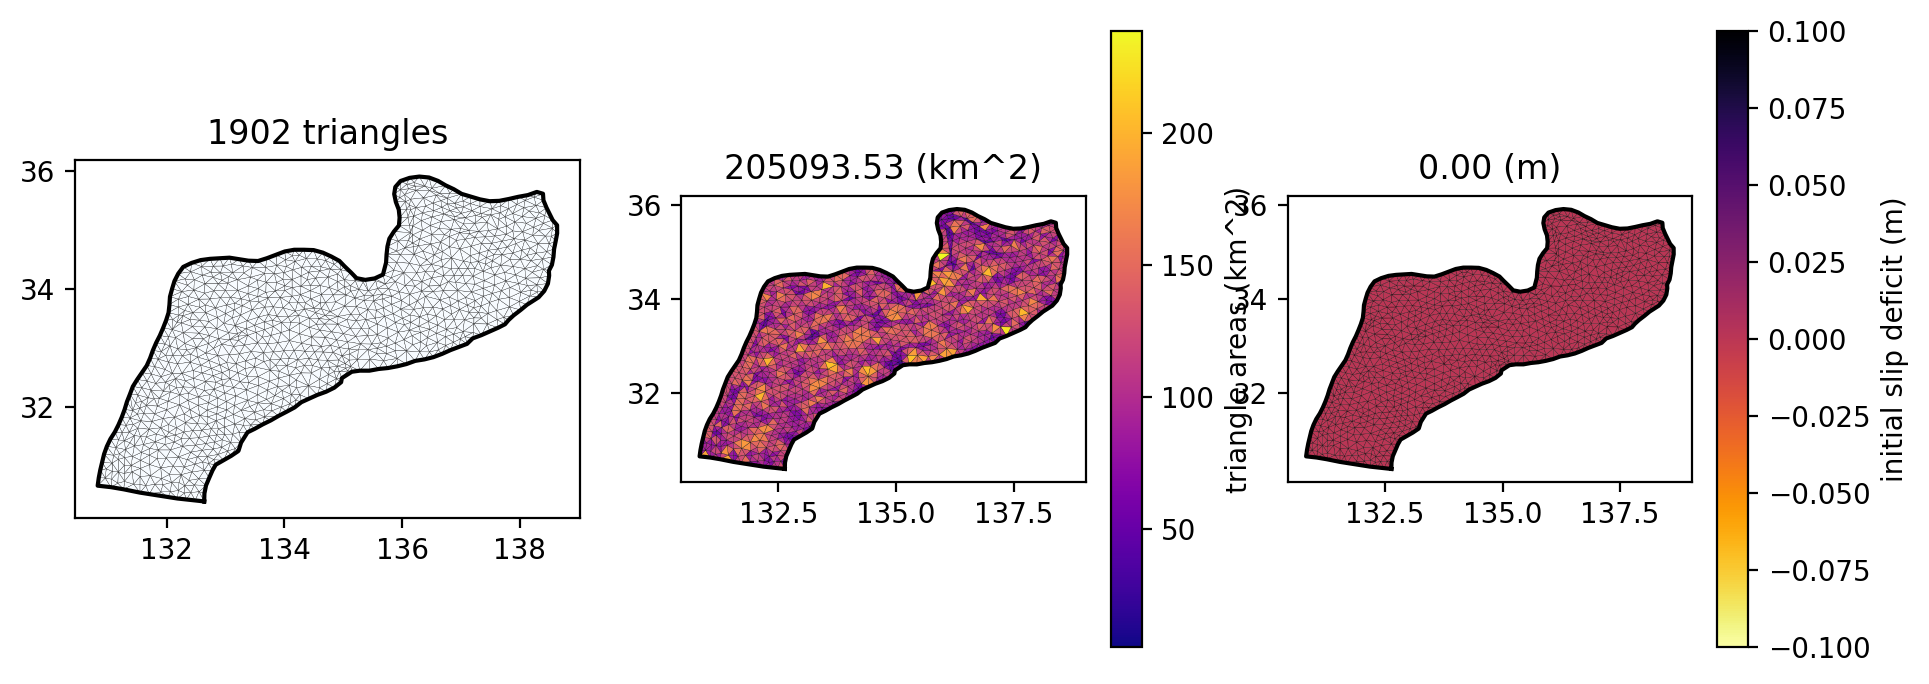

In [14]:
initial_slip_deficit = np.zeros(meshes[0].n_tde)
skies.plot_initial_data(meshes, initial_slip_deficit)


i=0
Number of triangle mesh elements = 29456
Number of eigenvalues = 1510
Plotting mode 0
Plotting mode 1
Plotting mode 2
Plotting mode 3
Plotting mode 4
Plotting mode 50
Plotting mode 51
Plotting mode 52
Plotting mode 53
Plotting mode 54


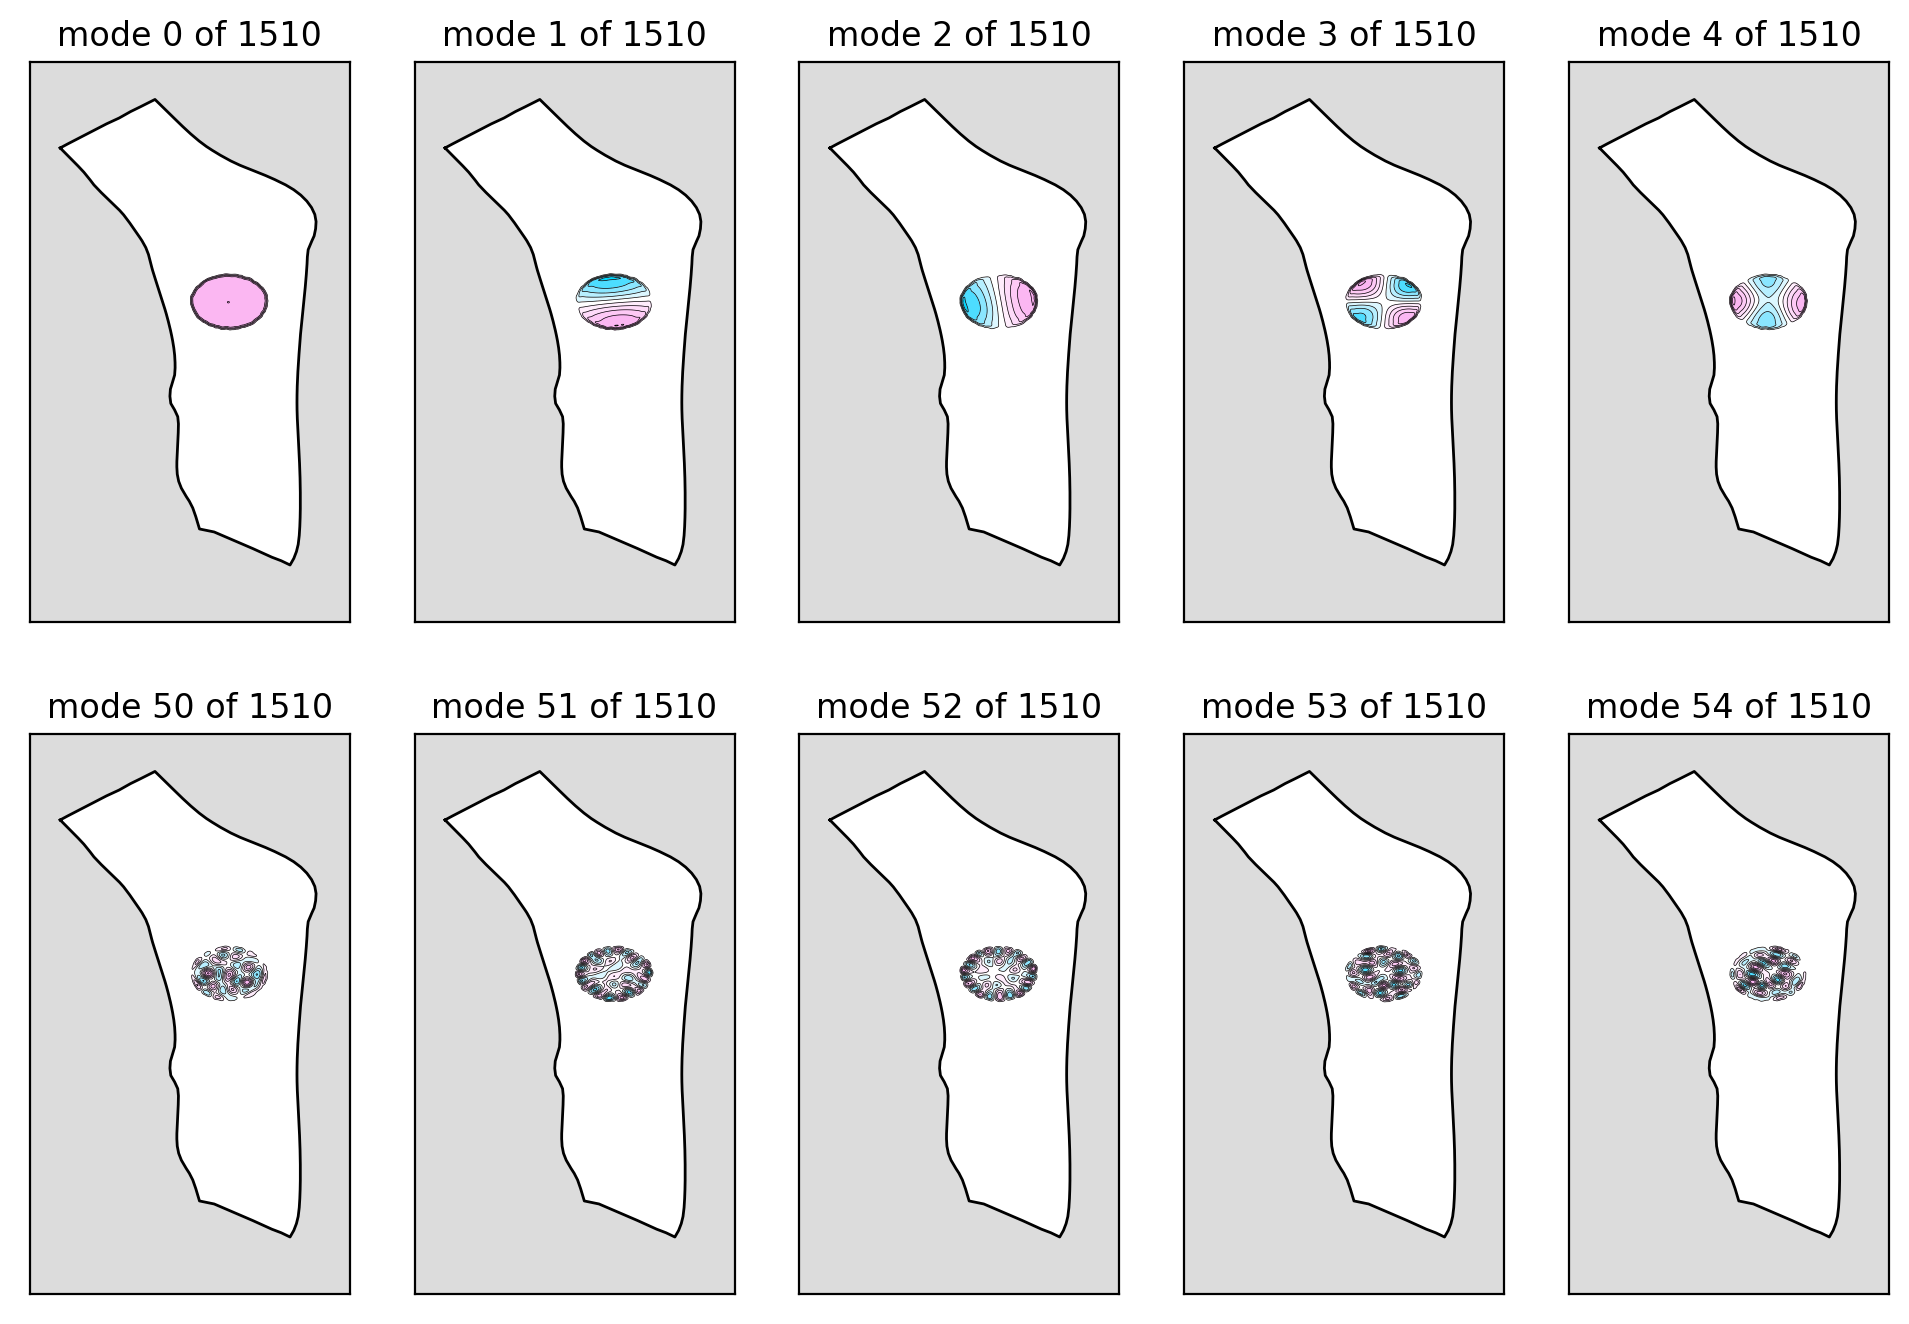

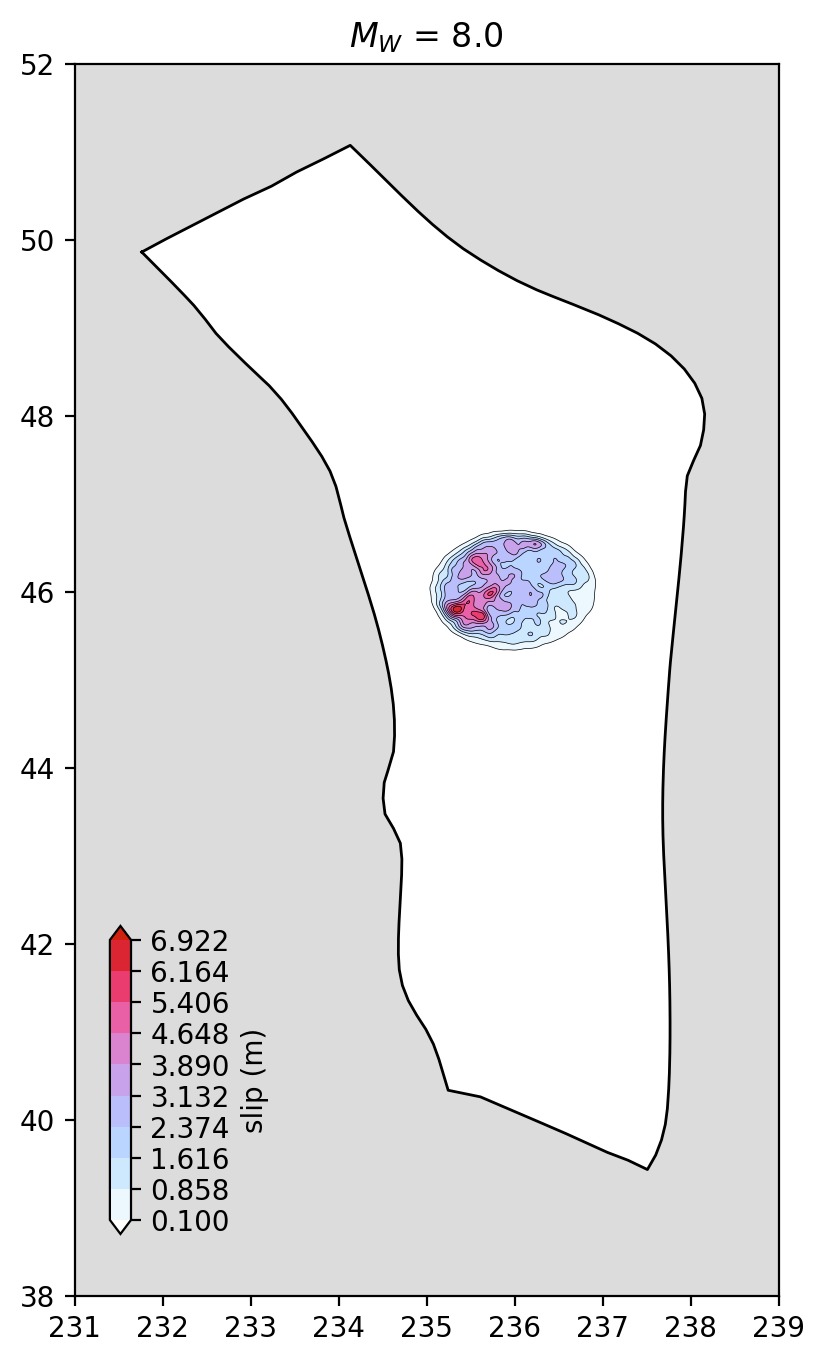

In [7]:
# Run and plotting parameters
params = addict.Dict()
params.n_grid_longitude = 500
params.n_grid_latitude = 500
params.min_longitude = 130.0
params.max_longitude = 140.0
params.min_latitude = 30.0
params.max_latitude = 37.0
params.n_contour_levels = 10
params.min_contour_value = 0.1  # (m)
params.savefig = True
params.run_name = run_name

# Event parameters
event = addict.Dict()
event.hypocenter_longitude = 136.0  #  (degrees)
event.hypocenter_latitude = 33.0  #  (degrees)
event.hypocenter_depth = -15.0  # (km)
event.shear_modulus = 3e10  #  (Pa)
event.area_scaling = 1.25

# example_moment_magnitudes = [6.0, 7.0, 8.0, 9.0]
example_moment_magnitudes = [8.0]
for i in range(len(example_moment_magnitudes)):
    print(f"{i=}")

    # Create synthetic event
    event.moment_magnitude = example_moment_magnitudes[i]
    event = skies.get_event_area_slip_hypocenter(meshes[0], event)

    # # Plot event eigenmodes
    # skies.plot_event_select_eigenmodes(meshes[0], event, params)

    # Plot event slip
    skies.quick_plot_slip(meshes[0], event, params)


# Gutenberg-Richter style earthquake frequency distribution

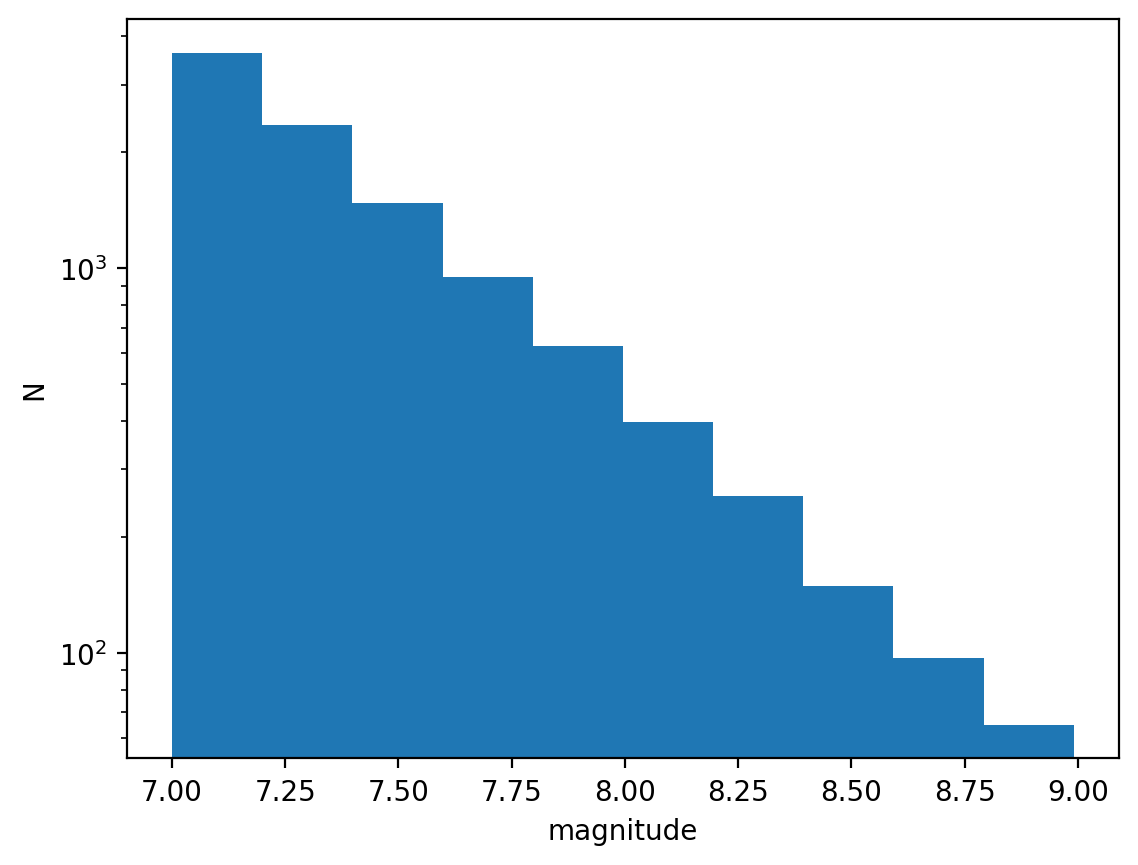

In [6]:
b_value = -1.0
minimum_event_moment_magnitude = 7.0
maximum_event_moment_magnitude = 9.0
n_events = 10000
magnitudes = np.zeros(n_events)
for i in range(n_events):
    magnitudes[i] = skies.get_gutenberg_richter_magnitude(
        b_value, minimum_event_moment_magnitude, maximum_event_moment_magnitude
    )

plt.figure()
plt.hist(magnitudes, log=True)
plt.xlabel("magnitude")
plt.ylabel("N")
plt.show()
